In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.12 (main, May 27 2025, 17:12:29) [GCC 11.4.0]

---------------------------------
Python interpreter: /home/imarevic/Documents/teaching/SRH/content/statistik/statistik-env/bin/python3


# Streuungsmaße

In [2]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, gaussian_kde

Die Maße der zentralen Tendenz, wie Mittelwert, Median und Modus, geben nicht das ganze Bild der Verteilung eines Datensatzes wieder. Zwei Datensätze mit identischem Mittelwert können völlig unterschiedliche Streuungen aufweisen. Die Streuung der Beobachtungswerte des einen Datensatzes kann viel größer oder kleiner sein als die des anderen Datensatzes. Daher ist der Mittelwert, Median oder Modus allein in der Regel kein ausreichendes Maß, um die Form der Verteilung eines Datensatzes aufzuzeigen. Wir benötigen auch ein Maß, das Informationen über die Variation zwischen den Datenwerten liefert. Diese Maße werden als **Streuungsmaße** bezeichnet. Die Maße der zentralen Tendenz und der Streuung ergeben zusammengenommen ein besseres Bild eines Datensatzes als die Maße der zentralen Tendenz allein ({cite:p}`fahrmeirstatistik` s.65).

## Varianz und Standardabweichung

Die **Varianz** ist die Summe der quadrierten Abweichungen vom Mittelwert. Die Varianz für Populationsdaten wird mit $\sigma^2$ bezeichnet (gelesen als Sigma-Quadrat), und die für Stichprobendaten berechnete Varianz wird mit $s^2$ bezeichnet. 

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{N} $$

und
$$ s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1} $$

wobei $\sigma^2$ die Varianz der Grundgesamtheit und $s^2$ die Stichprobenvarianz ist. Die Größe $x_i-\mu$ oder $x_i-\bar{x}$ in den obigen Formeln wird als die Abweichung des $x_i$-Wertes $(x_1,x_2, \dots ,x_n)$ vom Mittelwert bezeichnet ({cite:p}`fahrmeirstatistik` s.64). 

Die <a href="https://de.wikipedia.org/wiki/Varianz_(Stochastik)">Standardabweichung</a> ist das gebräuchlichste Maß für die Streuung. Der Wert der Standardabweichung gibt an, wie eng die Werte eines Datensatzes um den Mittelwert herum gestreut sind. Im Allgemeinen zeigt ein niedriger Wert der Standardabweichung für einen Datensatz an, dass die Werte dieses Datensatzes über einen relativ kleineren Bereich um den Mittelwert herum verteilt sind. Im Gegensatz dazu zeigt ein größerer Wert der Standardabweichung für einen Datensatz an, dass die Werte dieses Datensatzes über einen relativ größeren Bereich um den Mittelwert herum gestreut sind ({cite:p}`fahrmeirstatistik` s.65).


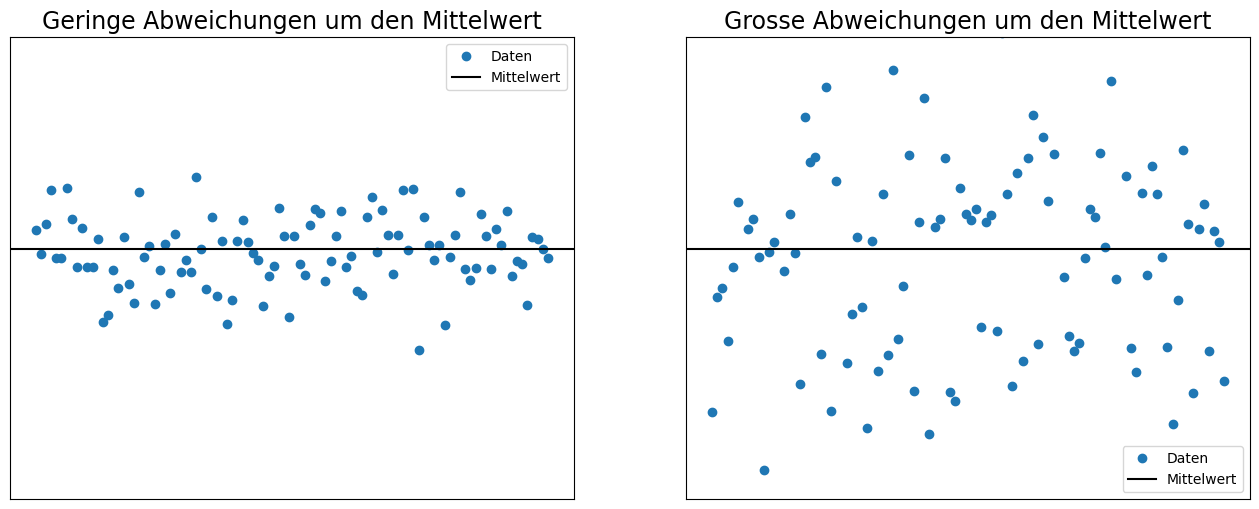

In [3]:
import matplotlib.pyplot as plt

TITLESIZE = 17
SEED = np.random.seed(42)
SIZE = 100
x = np.linspace(0, 1, SIZE)

fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

y = np.random.normal(loc=0.5, scale=1.0, size=SIZE)
ax[0].plot(x, y, "o")
ax[0].set_title("Geringe Abweichungen um den Mittelwert", size=TITLESIZE)

y = np.random.normal(loc=0.5, scale=3.0, size=SIZE)
ax[1].plot(x, y, "o")
ax[1].set_title("Grosse Abweichungen um den Mittelwert", size=TITLESIZE)

for _ax in ax:
    _ax.set_xticks([])
    _ax.set_yticks([])
    _ax.axhline(0.5, color="k")
    _ax.set_ylim(-6, 6)
    _ax.legend(["Daten", "Mittelwert"])

Die Standardabweichung erhält man durch Ziehen der Quadratwurzel aus der **Varianz**. Folglich wird die für Grundgesamtheitsdaten berechnete Standardabweichung mit $\sigma$ und die für Stichprobendaten berechnete Standardabweichung mit $s$ bezeichnet. 

$$ \sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \mu)^2}{N}} $$

und 

$$ s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}} $$ 

wobei $\sigma$ die Standardabweichung der Grundgesamtheit und $s$ die Standardabweichung der Stichprobe ist.

Als Übung berechnen wir für einige numerische Variablen, die im `students` Datensatz von Interesse sind, den Mittelwert, den Median, die Varianz und die Standardabweichung und stellen sie in einem Dataframe dar.

In [4]:
# Lesen der Datei students.csv als Dataframe; nur die Spalten "age", "weight", "height" und "nc_score" Spalten werden eingelesen
students = pd.read_csv(
    "../../data/students.csv",
    index_col=0,
    usecols=["age", "height", "weight", "nc_score"],
)
# Zeige die ersten 10 Werte
students.head(10)

,height,weight,nc_score
age,,,
19,160,64.8,1.91
19,172,73.0,1.56
22,168,70.6,1.24
19,183,79.7,1.37
21,175,71.4,1.46
19,189,85.8,1.34
21,156,65.9,1.11
21,167,65.7,2.03
18,195,94.4,1.29


Pandas verfügt über die Methode `agg`. Diese lässt uns sehr einfach verschiedene deskritptive Statisitken berechnen.

In [5]:
students.agg(["mean", "median", "var", "std"])

,height,weight,nc_score
mean,171.380750,72.998131,2.166481
median,171.000000,71.800000,2.040000
var,122.711652,74.566017,0.658610
std,11.077529,8.635162,0.811548


### Verwendung der Standardabweichung
Mit Hilfe des **Mittelwerts** und der **Standardabweichung** lässt sich der Anteil oder Prozentsatz der Gesamtbeobachtungen ermitteln, die in ein bestimmtes Intervall um den Mittelwert fallen.

#### Tschebyscheff-Theorem
Die <a href="https://de.wikipedia.org/wiki/Tschebyscheffsche_Ungleichung">Tschebyscheff Ungleichung</a> gibt eine untere Schranke für die Fläche unter einer Kurve zwischen zwei Punkten, die auf gegenüberliegenden Seiten des Mittelwerts und im gleichen Abstand vom Mittelwert liegen.

> **Für jede Zahl $k$, die größer als $1$ ist, liegen mindestens $1-\frac{1}{k^2}$ der Datenwerte innerhalb von $k$ Standardabweichungen vom Mittelwert.**

Lassen Sie uns Python verwenden, um ein Gefühl für den Tschebyscheff-Theorem zu bekommen.

In [6]:
k = np.arange(1, 4.1, 0.1)
value = np.round((1 - (1 / k**2)) * 100)
chebyshev = pd.DataFrame({"k": k, "Prozent": value})
chebyshev

,k,Prozent
0,1.0,0.0
1,1.1,17.0
2,1.2,31.0
3,1.3,41.0
4,1.4,49.0
5,1.5,56.0
6,1.6,61.0
7,1.7,65.0
8,1.8,69.0
9,1.9,72.0


Um es in Worte zu fassen: Für $k=2$ bedeutet das, dass mindestens **$75 \% $** der Datenwerte innerhalb von **2 Standardabweichungen** vom Mittelwert liegen.

Stellen wir das Tschebyscheff-Theorem mit Python dar: 

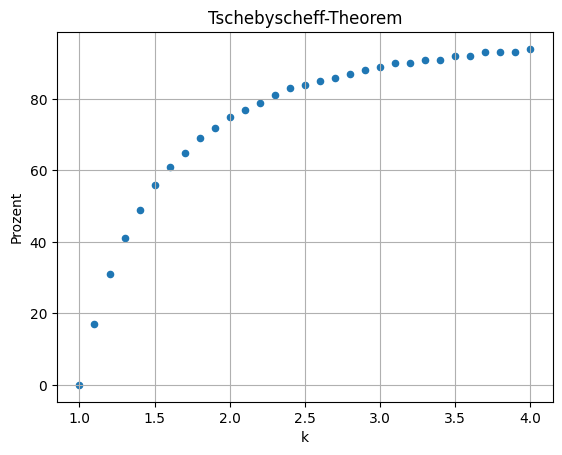

In [7]:
fig, ax = plt.subplots()
chebyshev.plot.scatter(x="k", y="Prozent", ax=ax)
ax.set_title("Tschebyscheff-Theorem")
ax.grid()

Das Theorem gilt sowohl für Stichproben- als auch für Grundgesamtheitsdaten. Die Tschebyscheffsche Ungleichung gilt für Verteilungen beliebiger Form. Sie kann jedoch nur für $k > 1$ verwendet werden. Denn wenn $k=1$ ist, ist der Wert von $1-\frac{1}{k^2}$ Null, und wenn $k < 1$ ist, ist der Wert von $1-\frac{1}{k^2}$ negativ ({cite:p}`fahrmeirstatistik` s.304). 

#### Empirische Regel
Während die Tschebyscheffsche Ungleichung auf jede Art von Verteilung anwendbar ist, gilt die **empirische Regel** nur für eine bestimmte Art von Verteilung, die so genannte **Gaußverteilung** oder **Normalverteilung**. Es gibt 3 Regeln: <br> <br> Bei einer Normalverteilung sind   

1.  $68 \%$ der Beobachtungen innerhalb einer Standardabweichung des Mittelwerts.
2.  $95 \%$ der Beobachtungen innerhalb von zwei Standardabweichungen des Mittelwerts.
3.  $99,7 \%$ der Beobachtungen innerhalb von drei Standardabweichungen des Mittelwerts.



Da wir inzwischen über genügend Hacking-Power verfügen, werden wir versuchen zu testen, ob die drei Regeln gültig sind. 

**(1) Erstens** werden wir die Funktion `random.normal()` in Python erforschen, um normalverteilte Daten zu erzeugen, und 

**(2) Zweitens** werden wir zu unserem `students` Datensatz zurückkehren um diese Regeln an diesem Datensatz zu validieren. 
<br> <br> Die Normalverteilung gehört zur Familie der <a href="https://de.wikipedia.org/wiki/Wahrscheinlichkeitsma%C3%9F">stetigen Verteilungen</a>. In Python gibt es eine Vielzahl von Wahrscheinlichkeitsverteilungen <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">(hier)</a>. Um Daten aus einer Normalverteilung zu erzeugen, kann man die Funktion `random.normal()` verwenden, die ein Zufallsvariablengenerator für die Normalverteilung ist.

Mit der Funktion `np.random.normal(loc=0.0, scale=1.0)` können wir Zufallsvariablen aus einer Normalverteilung mit einem gegebenen Mittelwert (Standard ist $0$) und einer Standardabweichung (Standard ist $1$) entnehmen. Mit dem Argument `size` können wir die Anzahl der erzeugten Zufallsvariablen bestimmen.

In [8]:
np.random.normal(loc=0.0, scale=1.0, size=1)

array([0.35778736])

In [9]:
np.random.normal(loc=0.0, scale=1.0, size=1)

array([0.56078453])

In [10]:
np.random.normal(loc=0.0, scale=1.0, size=1)

array([1.08305124])

Wir können die Funktion ziemlich einfach bitten, hunderte oder tausende oder noch mehr (Pseudo-)Zufallszahlen zu ziehen:

In [11]:
np.random.normal(loc=0.0, scale=1.0, size=10)

array([ 1.05380205, -1.37766937, -0.93782504,  0.51503527,  0.51378595,
        0.51504769,  3.85273149,  0.57089051,  1.13556564,  0.95400176])

In [12]:
np.random.normal(loc=0.0, scale=1.0, size=100)

array([ 0.65139125, -0.31526924,  0.75896922, -0.77282521, -0.23681861,
       -0.48536355,  0.08187414,  2.31465857, -1.86726519,  0.68626019,
       -1.61271587, -0.47193187,  1.0889506 ,  0.06428002, -1.07774478,
       -0.71530371,  0.67959775, -0.73036663,  0.21645859,  0.04557184,
       -0.65160035,  2.14394409,  0.63391902, -2.02514259,  0.18645431,
       -0.66178646,  0.85243333, -0.79252074, -0.11473644,  0.50498728,
        0.86575519, -1.20029641, -0.33450124, -0.47494531, -0.65332923,
        1.76545424,  0.40498171, -1.26088395,  0.91786195,  2.1221562 ,
        1.03246526, -1.51936997, -0.48423407,  1.26691115, -0.70766947,
        0.44381943,  0.77463405, -0.92693047, -0.05952536, -3.24126734,
       -1.02438764, -0.25256815, -1.24778318,  1.6324113 , -1.43014138,
       -0.44004449,  0.13074058,  1.44127329, -1.43586215,  1.16316375,
        0.01023306, -0.98150865,  0.46210347,  0.1990597 , -0.60021688,
        0.06980208, -0.3853136 ,  0.11351735,  0.66213067,  1.58

Wenn wir ein Histogramm dieser Zahlen erstellen, sehen wir die namensgebende glockenförmige Verteilung.

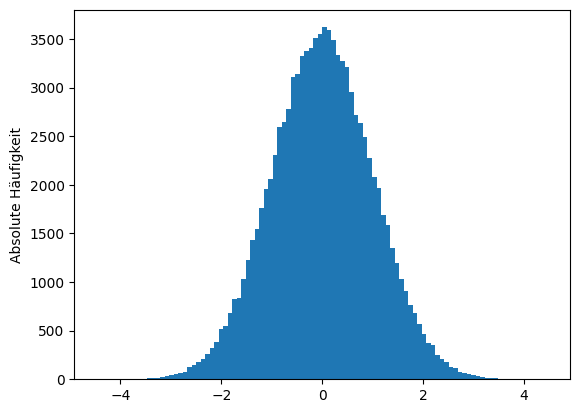

In [13]:
y_norm = np.random.normal(loc=0.0, scale=1.0, size=100000)
bins = int(len(y_norm) / 1000)  # bestimmt die Anzahl der Bins
plt.hist(y_norm, bins=bins)
plt.ylabel("Absolute Häufigkeit")
plt.show()

Wir kennen bereits den Mittelwert und die Standardabweichung der Werte in `y_norm`, da wir die Funktion `np.random.normal()` explizit mit `mean=0` und `sd=1` aufgerufen haben. Wir müssen also nur die Zahlen in `y_norm` zählen, die größer als $-1$ bzw. kleiner als $1$ und $2$ bzw. $-2$ und $3$ bzw. $-3$ sind, und sie zur Länge von `y_norm`, in unserem Fall $100.000$, in Beziehung setzen, um die drei oben genannten Regeln zu bestätigen.

In [14]:
# Berechne Anzahl der Werte < 1 - Anzahl der Werte > -1 durch Gesamtanzahl
sd1 = sum((y_norm > -1) & (y_norm < 1)) / len(y_norm)

# Berechne Anzahl der Werte < 2 - Anzahl der Werte  > -2 durch Gesamtanzahl
sd2 = sum((y_norm > -2) & (y_norm < 2)) / len(y_norm)

# Berechne Anzahl der Werte < 3 - Anzahl der Werte > -3 durch Gesamtanzahl
sd3 = sum((y_norm > -3) & (y_norm < 3)) / len(y_norm)

print("sd1 :", sd1)
print("sd2 :", sd2)
print("sd3 :", sd3)

sd1 : 0.68143
sd2 : 0.95444
sd3 : 0.99737


Perfekte Übereinstimmung! Die drei empirischen Regeln sind offensichtlich gültig. Um unsere Ergebnisse zu veranschaulichen, stellen wir das Histogramm erneut dar und fügen einige Anmerkungen hinzu. Bitte beachten Sie, dass wir in der `hist()`-Funktion das Argument `density=True` setzen. Dies hat zur Folge, dass das resultierende Histogramm nicht mehr die Zählungen auf der y-Achse anzeigt, sondern die **Dichtewerte** (normalisierte Zählung geteilt durch Bin-Breite), was bedeutet, dass sich die Balkenbereiche zu $1$ summieren.

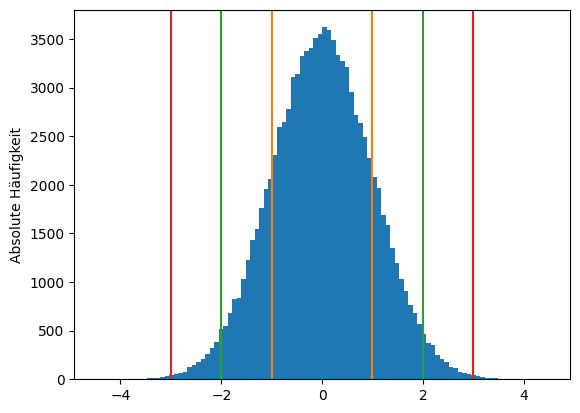

In [15]:
fig, ax = plt.subplots()
ax.hist(y_norm, bins=bins)
ax.set_ylabel("Absolute Häufigkeit")
for e, std in enumerate([(-1, 1), (-2, 2), (-3, 3)]):
    plt.axvline(std[0], color=f"C{e+1}")
    plt.axvline(std[1], color=f"C{e+1}")

Nun, lassen Sie uns an der **zweiten** Aufgabe arbeiten: Überprüfen Sie die drei empirischen Regeln anhand des `students` Datensatzes. Dazu müssen wir überprüfen, ob eine der numerischen Variablen im Studentendatensatz  normalverteilt ist. Wir beginnen mit der Extraktion numerischer Variablen von Interesse aus dem `students` Datensatz. Dann zeichnen wir Histogramme und beurteilen, ob die Variable normalverteilt ist oder nicht. Zunächst überprüfen wir jedoch den Datensatz, indem wir die Funktion `head()` aufrufen.

In [16]:
# Lesen der Datei students.csv als Dataframe;
students = pd.read_csv(
    "../../data/students.csv",
    usecols=["age", "height", "weight", "score1", "score2", "salary"],
)
students.head(10)

,age,height,weight,score1,score2,salary
0,19,160,64.8,NaN,NaN,NaN
1,19,172,73.0,NaN,NaN,NaN
2,22,168,70.6,45.0,46.0,NaN
3,19,183,79.7,NaN,NaN,NaN
4,21,175,71.4,NaN,NaN,NaN
5,19,189,85.8,NaN,NaN,NaN
6,21,156,65.9,NaN,NaN,NaN
7,21,167,65.7,58.0,62.0,NaN
8,18,195,94.4,57.0,67.0,NaN
9,18,165,66.0,NaN,NaN,NaN


Um einen Überblick über die Form der Verteilung der einzelnen Variablen zu erhalten, verwenden wir die Methode `hist()`.

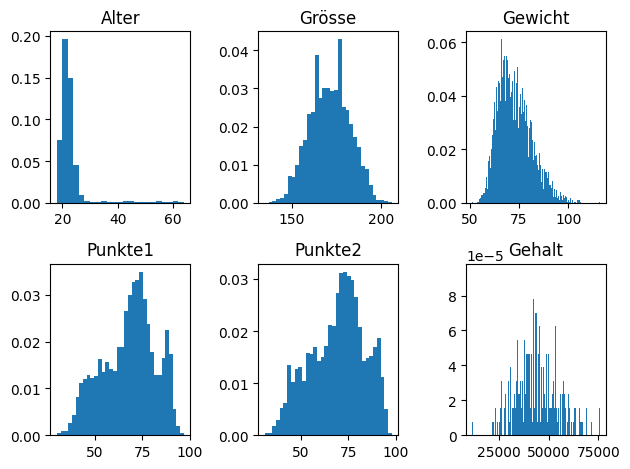

In [17]:
cols = students.columns
fig, ax = plt.subplots(ncols=int(len(cols) / 2), nrows=2)
ax = np.ravel(ax)  # vereinfacht das iterieren durch die axes Objekte
titles = {
    "age": "Alter",
    "height": "Grösse",
    "weight": "Gewicht",
    "score1": "Punkte1",
    "score2": "Punkte2",
    "salary": "Gehalt",
}

for e, col in enumerate(cols):
    bins = int(students[col].nunique() / 2)
    ax[e].hist(students[col], bins=bins, density=True)
    ax[e].set_title(titles[col])
fig.tight_layout()

Wir stellen sofort fest, dass einige Variablen positiv verzerrt sind, also schließen wir sie aus und behalten diejenigen, die normal verteilt zu sein scheinen.

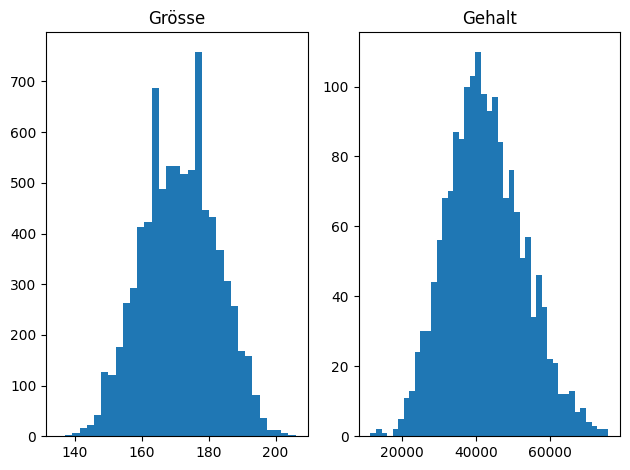

In [18]:
cols = ["height", "salary"]
fig, ax = plt.subplots(ncols=2)
ax = np.ravel(ax)  # vereinfacht das iterieren durch die axes Objekte
bins_fact = {"height": 2, "salary": 40}

for e, col in enumerate(cols):
    bins = int(students[col].nunique() / bins_fact[col])
    ax[e].hist(students[col], bins=bins)
    ax[e].set_title(titles[col])
fig.tight_layout()

Nun, sowohl die Variable `height` als auch die Variable `salary` scheinen mehr oder weniger normalverteilt zu sein. Es ist also eine Frage des Geschmacks, welche Variable man für die weitere Analyse auswählt. Für den Moment bleiben wir bei der Gehaltsvariable und überprüfen, ob die drei oben genannten empirischen Regeln gültig sind. Wir wechseln zu Python und validieren diese Regeln, indem wir zunächst den Mittelwert und die Standardabweichungen berechnen. Bitte beachten Sie, dass die Gehaltsvariable Fehlwerte enthält, die mit `NA` gekennzeichnet sind. Daher schließen wir zunächst alle `NA`-Werte aus, indem wir die Funktion `dropna()` anwenden.

In [19]:
salary = students["salary"].dropna()
salary

10      45254.11
12      40552.79
13      27007.03
16      33969.16
27      50617.64
          ...   
8228    33259.70
8233    41028.24
8234    36750.09
8237    40112.04
8238    45900.13
Name: salary, Length: 1753, dtype: float64

In [20]:
print(f"Mittelwert des Gehalts:             {salary.mean()}")
print(f"1 Standardabweichung des Gehalts:   {salary.std()}")
print(f"2 Standardabweichungen des Gehalts: {2 * salary.std()}")
print(f"3 Standardabweichungen des Gehalts: {3 * salary.std()}")

Mittelwert des Gehalts:             42522.112253280095
1 Standardabweichung des Gehalts:   10333.139991647347
2 Standardabweichungen des Gehalts: 20666.279983294695
3 Standardabweichungen des Gehalts: 30999.419974942044


Wie in der obigen allgemeinen Beispielform zählen wir die Anzahl der Werte, die größer als $+1$ s.d. bzw. kleiner als $-1$ s.d. und $+2$ s.d. bzw. $-2$ s.d. und $+3$ s.d. bzw. $-3$ s.d. sind, und setzen sie in Beziehung zur Länge des Vektors, in unserem Fall $1753$.

In [21]:
salary_mean = salary.mean()
salary_std = salary.std()

sd1 = (
    sum((salary > (salary_mean - salary_std)) & (salary < (salary_mean + salary_std)))
    / salary.shape[0]
)

sd2 = (
    sum(
        (salary > (salary_mean - 2 * salary_std))
        & (salary < (salary_mean + 2 * salary_std))
    )
    / salary.shape[0]
)


sd3 = (
    sum(
        (salary > (salary_mean - 3 * salary_std))
        & (salary < (salary_mean + 3 * salary_std))
    )
    / salary.shape[0]
)


print("sd1 :", sd1)
print("sd2 :", sd2)
print("sd3 :", sd3)

sd1 : 0.6708499714774672
sd2 : 0.9560752994865944
sd3 : 0.9977181973759269


Wow, ziemlich nah dran! Offensichtlich zeigt die Gehaltsvariable eine starke Tendenz zur Unterstützung der so genannten empirischen Regel. Wir stellen das Histogramm für die Variable `salary` dar, um unseren Eindruck zu bestätigen. 

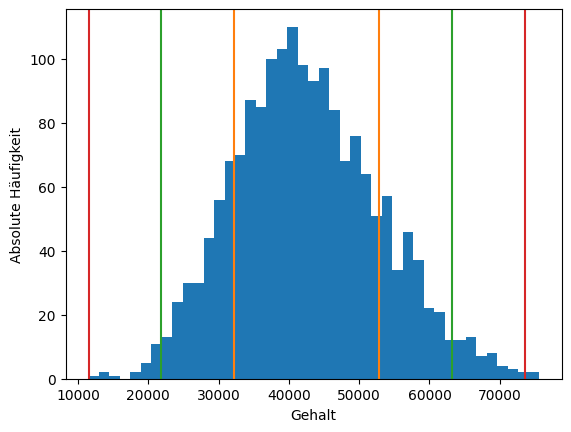

In [22]:
fig, ax = plt.subplots()
bins = int(salary.nunique() / 40)
ax.hist(salary, bins=bins)
ax.set_ylabel("Absolute Häufigkeit")
ax.set_xlabel("Gehalt")
for e in range(3):
    ax.axvline(salary_mean + (e + 1) * salary_std, color=f"C{e+1}")
    ax.axvline(salary_mean - (e + 1) * salary_std, color=f"C{e+1}")

Wir können nun unseren Visualisierungsansatz erweitern, indem wir die **empirische Dichteschätzung** mit der Funktion `scipy_kernel.evaluate()` grafisch darstellen und ihre Form überprüfen. Wir stellen die empirische Dichteschätzung als gestrichelte Linie dar, indem wir das <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html">(Linientyp-Argument)</a> `'-.'` und eine Linienbreite von $3$ (Argument `linewidth=3.0`) setzen.

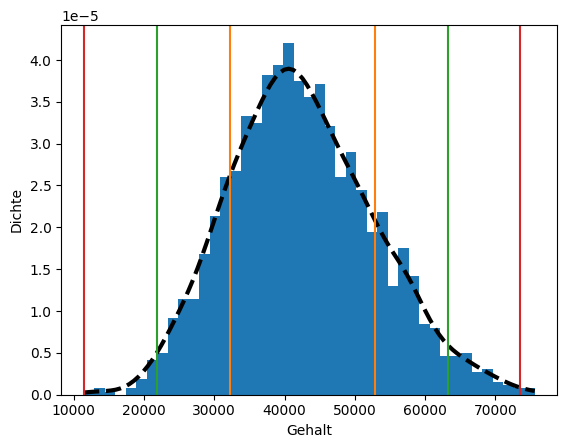

In [23]:
fig, ax = plt.subplots()
bins = int(salary.nunique() / 40)
ax.hist(salary, bins=bins, density=True)
ax.set_ylabel("Dichte")
ax.set_xlabel("Gehalt")

# empirische Dichteschätzung
x_salary = np.linspace(salary.min(), salary.max(), 100)
scipy_kernel = gaussian_kde(salary)
dens_emp = scipy_kernel.evaluate(x_salary)
ax.plot(x_salary, dens_emp, color="k", linestyle="dashed", linewidth=3.0)

# Standardabweichungen
for e in range(3):
    ax.axvline(salary_mean + (e + 1) * salary_std, color=f"C{e+1}")
    ax.axvline(salary_mean - (e + 1) * salary_std, color=f"C{e+1}")

Schließlich vergleichen wir unsere **empirische Dichteschätzung** mit der theoretischen **Wahrscheinlichkeitsdichtefunktion**, die auf dem tatsächlichen Mittelwert und der Standardabweichung der Daten `salary` basiert. Für einen besseren visuellen Vergleich wechseln wir zurück zu einer nicht eingefärbten Histogramm-Darstellung.

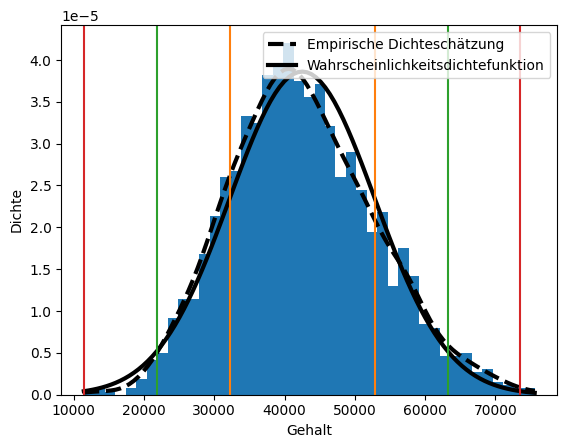

In [24]:
fig, ax = plt.subplots()
bins = int(salary.nunique() / 40)
ax.hist(salary, bins=bins, density=True)
ax.set_ylabel("Dichte")
ax.set_xlabel("Gehalt")

# empirische Dichteschätzung
x_salary = np.linspace(salary.min(), salary.max(), 100)
scipy_kernel = gaussian_kde(salary)
dens_emp = scipy_kernel.evaluate(x_salary)
ax.plot(
    x_salary,
    dens_emp,
    color="k",
    linestyle="dashed",
    linewidth=3.0,
    label="Empirische Dichteschätzung",
)

# Wahrscheinlichkeitsdichtefunktion
pdf = norm.pdf(x_salary, loc=salary.mean(), scale=salary.std())
ax.plot(
    x_salary, pdf, color="k", linewidth=3.0, label="Wahrscheinlichkeitsdichtefunktion"
)

# Standardabweichungen
for e in range(3):
    ax.axvline(salary_mean + (e + 1) * salary_std, color=f"C{e+1}")
    ax.axvline(salary_mean - (e + 1) * salary_std, color=f"C{e+1}")
ax.legend()

Wir können daraus schließen, dass `salary` im Datensatz der `students` ungefähr normalverteilt ist. Die Grafik zeigt jedoch, dass die Verteilung der Gehaltsvariablen leicht linksschief ist. Dies ist an der Abweichung zwischen der **empirischen Dichteschätzung** und der **Wahrscheinlichkeitsdichtefunktion** zu erkennen.

## Die Spannweite

Die **Spannweite** als Maß für die Streuung ist einfach zu berechnen. Sie ergibt sich aus der Differenz zwischen dem größten und dem kleinsten Wert in einem Datensatz.

$$\text{Range} = \text{größter Wert} - \text{kleinster Wert}$$

Betrachten wir unseren `students` Datensatz. Wir unterteilen den Datensatz so, dass er nur numerische Daten enthält.

In [25]:
df = pd.read_csv("../../data/students.csv")
df.sample(10)

,stud_id,name,gender,age,height,weight,religion,nc_score,semester,major,minor,score1,score2,online_tutorial,graduated,salary
3599,255883,"Morrison-Cook, Austin",Male,20,172,72.6,Other,1.67,4th,Mathematics and Statistics,Economics and Finance,91.0,87.0,0,0,NaN
2081,686345,"Lenahan, Kyle",Male,21,181,78.0,Other,1.38,2nd,Social Sciences,Economics and Finance,NaN,NaN,0,0,NaN
521,346731,"Lee, Nicholas",Male,22,192,93.1,Catholic,1.27,5th,Environmental Sciences,Social Sciences,78.0,65.0,1,1,49068.50
5603,963305,"Kramer, David",Male,56,170,72.6,Orthodox,2.14,5th,Environmental Sciences,Mathematics and Statistics,72.0,71.0,1,1,42606.35
3670,124687,"Than, Jonathan",Male,22,172,72.4,Protestant,1.79,4th,Environmental Sciences,Mathematics and Statistics,62.0,69.0,0,1,49004.73
5375,696262,"Macasinag, Paulo",Male,20,197,94.3,Catholic,3.41,6th,Political Science,Environmental Sciences,51.0,47.0,1,1,39442.80
2317,452190,"Briseno, Alisha",Female,63,162,68.0,Catholic,2.19,2nd,Mathematics and Statistics,Environmental Sciences,NaN,NaN,0,0,NaN
4839,955228,"Thapa, Richard",Male,23,175,76.0,Other,2.48,1st,Mathematics and Statistics,Environmental Sciences,NaN,NaN,0,0,NaN
1285,854649,"Duling, Joshua Ian",Male,61,170,70.3,Protestant,1.54,>6th,Economics and Finance,Mathematics and Statistics,64.0,69.0,1,0,NaN
117,582922,"Valenciano-Poffenbarger, Quincie",Female,19,175,76.8,Catholic,2.19,1st,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


Wir sind also an den Kategorien `age`, `height`, `weight` und `nc_score` interessiert. Wir verwenden die Methoden `min()` und `max()`, um das Minimum und Maximum der ausgewählten Variablen zu berechnen. Erneut greifen wir auf die `agg`-Methode zurück.

In [26]:
summary = df[["age", "height", "weight", "nc_score"]].agg(["min", "max"])
summary

,age,height,weight,nc_score
min,18,135,51.4,1.0
max,64,206,116.0,4.0


Um nun die Spannweite für jede Variable zu berechnen, müssen wir nur eine Zeile von der anderen abziehen.

In [27]:
summary.loc["Spannweite"] = summary.loc["max"] - summary.loc["min"]
summary

,age,height,weight,nc_score
min,18.0,135.0,51.4,1.0
max,64.0,206.0,116.0,4.0
Spannweite,46.0,71.0,64.6,3.0


Die Spannweite hat, wie der Mittelwert, den Nachteil, dass sie durch Ausreißer beeinflusst wird. Daher ist die Spannweite kein gutes Streuungsmaß für einen Datensatz, der Ausreißer enthält. Ein weiterer Nachteil der Verwendung der Spannweite als Streuungsmaß ist, dass ihre Berechnung nur auf zwei Werten basiert: Dem größten und dem kleinsten. Alle anderen Werte in einem Datensatz werden bei der Berechnung der Spanne ignoriert. Daher ist die Spannweite oftmals kein sehr zufriedenstellendes Maß für die Streuung ({cite:p}`fahrmeirstatistik` s.62).